# Intro

In [1]:
import spacy

%load_ext nb_black

nlp = spacy.load("en_core_web_sm")

ModuleNotFoundError: No module named 'nb_black'

In [ ]:
# Process sentences 'Hello, world. Antonio is learning Python.' using spaCy
doc = nlp(u"Hello, world. Antonio is learning Python.")

## Get tokens and sentences

#### What is a Token?
A token is a single chopped up element of the sentence, which could be a word or a group of words to analyse. The task of chopping the sentence up is called "tokenisation".

Example: The following sentence can be tokenised by splitting up the sentence into individual words.

	"Antonio is learning Python!"
	["Antonio","is","learning","Python!"]

In [ ]:
# Get first token of the processed document
token = doc[0]
print(token)

# Print sentences (one sentence per line)
for sent in doc.sents:
    print(sent)

## Part of speech tags

#### What is a Speech Tag?
A speech tag is a context sensitive description of what a word means in the context of the whole sentence.
More information about the kinds of speech tags which are used in NLP can be [found here](http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/).

Examples:

1. CARDINAL, Cardinal Number - 1,2,3
2. PROPN, Proper Noun, Singular - "Jan", "Javier", "Antonio", "Italy"
3. INTJ, Interjection - "Ohhhhhhhhhhh"

In [5]:
# For each token, print corresponding part of speech tag
for token in doc:
    print("{} - {}".format(token, token.pos_))

Hello - INTJ
, - PUNCT
world - NOUN
. - PUNCT
Antonio - PROPN
is - AUX
learning - VERB
Python - PROPN
. - PUNCT


<IPython.core.display.Javascript object>

In [6]:
from spacy import displacy

<IPython.core.display.Javascript object>

In [7]:
displacy.serve(doc, style='dep')



/opt/homebrew/anaconda3/envs/condaenv/lib/python3.9/site-packages/spacy/displacy/__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


<IPython.core.display.Javascript object>

In [8]:
displacy.render(doc, style = "ent",jupyter = True)


<IPython.core.display.Javascript object>

We have said that dependency structures are represented by directed graphs that satisfy the following constraints:

1. There is a single designated root node that has no incoming arcs.

2. With the exception of the root node, each vertex has exactly one incoming arc.

3. There is a unique path from the root node to each vertex in V.

You can inspect the head of each token by invoking the `.head` attribute of a spaCy token:


In [9]:
doc[2]

world

<IPython.core.display.Javascript object>

In [10]:
doc[2].head

Hello

<IPython.core.display.Javascript object>

So how would you search for the root?

Since there is a unique path from the root node to each vertex in V, there's only one root node that has no incoming arcs, we can search for the token which have as head itself!

In [11]:
for token in doc:
    if token.head == token:
        print(token)

Hello
learning


<IPython.core.display.Javascript object>

As expected, since there were two sentences in the doc, we got two roots.

We can also build a function that, given a spaCy token, gives the path till the root:

In [12]:
def path_to_the_root(token):
    if token.head == token:
        return
    else:
        print(f"{token}->{token.head}")
        path_to_the_root(token.head)

<IPython.core.display.Javascript object>

In [13]:
path_to_the_root(doc[4])

Antonio->learning


<IPython.core.display.Javascript object>

# Pride and Prejudice analysis

We would like to:

- Extract the names of all the characters from the book (e.g. Elizabeth, Darcy, Bingley)
- Visualize characters' occurences with regards to relative position in the book
- Authomatically describe any character from the book
- Find out which characters have been mentioned in a context of marriage
- Build keywords extraction that could be used to display a word cloud (example)

To load the text file, it is convinient to decode using the utf-8 standard:

In [14]:
def read_file(file_name):
    with open(file_name, "r", encoding="utf-8") as file:
        return file.read()

<IPython.core.display.Javascript object>

### Process full text

In [15]:
text = read_file("data/pride_and_prejudice.txt")
processed_text = nlp(text)

<IPython.core.display.Javascript object>

In [17]:
# How many sentences are in the book (Pride & Prejudice)?

sentences = [s for s in processed_text.sents]
print(len(sentences))
print(len(list(processed_text.sents)))
# Print sentences from index 10 to index 15, to make sure that we have parsed the correct book
print(sentences[10:20])

7153
7153
[Release Date:, June, 1998
, Last updated: February 15, 2015]

, Language: English


, *** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE, ***




, Produced by Anonymous Volunteers





PRIDE AND PREJUDICE

, By Jane Austen



Chapter 1


, It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

, However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the rightful property
of some one or other of their daughters.

]


<IPython.core.display.Javascript object>

## Find all the personal names

In [20]:
# Extract all the personal names from Pride & Prejudice and count their occurrences.
# Expected output is a list in the following form: [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266) ...].

from collections import Counter, defaultdict


def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.

    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('elizabeth', 622), ('darcy', 312), ('jane', 286), ('bennet', 266)]
    """

    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            characters[ent.lemma_] += 1

    return characters.most_common()

print(find_character_occurences(processed_text)[:20])

[('Elizabeth', 600), ('Darcy', 355), ('Jane', 277), ('Bingley', 260), ('Bennet', 258), ('Collins', 166), ('Wickham', 108), ('Lizzy', 94), ('Gardiner', 90), ('Lady Catherine', 76), ('Kitty', 62), ('Meryton', 44), ('Pemberley', 37), ('Mary', 34), ('William', 33), ('Hurst', 30), ('Charlotte', 30), ('Forster', 30), ('Fitzwilliam', 29), ('Phillips', 28)]


<IPython.core.display.Javascript object>

## Plot characters personal names as a time series 

In [21]:
# Matplotlib Jupyter HACK
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

We can investigate where a particular entity occurs in the text. We can do it just accessing the `.start` attribute of an entity:


In [22]:
for ent in processed_text.ents:
    if ent.label_ == "PERSON":
        print(ent.start)

7
10
74
128
136
228
255
275
293
355
406
515
647
746
793
795
859
908
922
944
997
1012
1181
1285
1296
1371
1376
1393
1422
1438
1452
1496
1519
1550
1575
1609
1622
1635
1649
1701
1787
1835
1901
1927
1942
1969
2102
2172
2186
2310
2370
2393
2425
2475
2485
2554
2580
2610
2613
2709
2733
2762
2819
2855
2934
2954
2997
3009
3028
3080
3168
3233
3240
3244
3318
3371
3532
3602
3674
3752
3758
3763
3834
3851
3871
3873
3878
3885
3897
3958
4039
4071
4092
4147
4189
4226
4235
4243
4252
4257
4377
4417
4433
4534
4536
4553
4623
4785
5006
5040
5250
5285
5385
5401
5431
5521
5525
5567
5571
5590
5595
5604
5646
5657
5673
5680
5731
5790
5806
5849
5899
6071
6079
6127
6136
6181
6186
6195
6203
6229
6279
6294
6306
6314
6361
6432
6441
6475
6511
6552
6560
6579
6607
6613
6669
6701
6732
6737
6748
6756
6809
6892
6922
7064
7070
7201
7213
7216
7258
7271
7299
7351
7404
7444
7456
7613
7693
7745
7747
7789
7845
7891
7941
8085
8090
8262
8269
8294
8525
8542
8560
8571
8649
8665
8686
8711
8760
8772
8854
8884
8973
9050
9074
9114
9136


114428
114485
114660
114723
114742
114816
114858
114913
115096
115105
115132
115168
115287
115291
115438
115440
115472
115479
115499
115539
115593
115685
115691
115887
116018
116060
116096
116269
116302
116359
116406
116445
116473
116543
116633
116662
116682
116876
116893
116898
116920
117009
117127
117165
117224
117229
117274
117392
117406
117565
117605
117616
117619
117651
117734
117819
117848
117879
117887
117928
117948
117960
117998
118061
118139
118208
118235
118313
118353
118393
118473
118492
118539
118580
118697
118702
118704
118763
118812
118830
118851
119023
119133
119141
119280
119289
119477
119575
119686
119697
119759
119833
119890
120014
120072
120204
120261
120332
120427
120449
120572
120659
120784
120802
120804
120809
120838
120848
120852
121003
121021
121027
121063
121066
121123
121167
121264
121282
121365
121433
121458
121471
121475
121477
121512
121518
121522
121560
121568
121689
121872
121991
122026
122075
122147
122467
122501
122560
122697
122804
122817
122861
122942

<IPython.core.display.Javascript object>

In [ ]:
doc = nlp("Antonio goes to the beach. Antonio works at Strive School.")

doc.ents
[Antonio.start, Antonio.start, Strive School.start]



In [16]:
"Antonio goes to the beach and beach".find("beach")

20

In [ ]:
benneth

So we can create a function that stores all the offsets of every character:
    

In [23]:
def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list.
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.

    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """

    character_offsets = {}
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            if ent.lemma_.lower() not in character_offsets:
                character_offsets[ent.lemma_.lower()] = [ent.start]
            else:
                character_offsets[ent.lemma_.lower()].append(ent.start)
    return dict(character_offsets)


character_occurences = get_character_offsets(processed_text)

<IPython.core.display.Javascript object>

In [24]:
# Plot characters' mentions as a time series relative to the position of the actor's occurrence in a book.


def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list.
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.

    :param doc: Spacy NLP parsed document
    :return: dict object in form
        {'elizabeth': [123, 543, 4534], 'darcy': [205, 2111]}
    """

    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            character_offsets[ent.lemma_.lower()].append(ent.start)

    return dict(character_offsets)


character_occurences = get_character_offsets(processed_text)

<IPython.core.display.Javascript object>

In [25]:
character_occurences

{'prejudice': [7, 155589],
 'jane austen': [10, 74, 136, 155592],
 'anonymous volunteers': [128, 155648],
 'bennet': [228,
  255,
  293,
  515,
  1012,
  1181,
  1285,
  1496,
  1519,
  1835,
  2102,
  2186,
  2370,
  2393,
  2580,
  2613,
  2709,
  2762,
  3318,
  3602,
  3958,
  4039,
  4377,
  5790,
  5849,
  6186,
  6361,
  10192,
  10730,
  10864,
  11038,
  11054,
  11071,
  11275,
  11426,
  11586,
  11749,
  15290,
  15474,
  15503,
  15624,
  15629,
  15739,
  15755,
  16236,
  16295,
  17214,
  17579,
  18951,
  19270,
  19777,
  21189,
  22709,
  23298,
  23511,
  23630,
  23973,
  24028,
  24641,
  25089,
  25166,
  25507,
  25568,
  25646,
  25721,
  26013,
  26127,
  26467,
  26567,
  26643,
  26943,
  26956,
  26980,
  27047,
  27388,
  27451,
  27602,
  27627,
  27705,
  27780,
  28303,
  29187,
  30215,
  34155,
  34209,
  34232,
  39526,
  40030,
  40745,
  41186,
  41261,
  41331,
  41424,
  41526,
  41742,
  42046,
  44079,
  44218,
  44436,
  44474,
  44522,
  4458

<IPython.core.display.Javascript object>

In [44]:
NUM_BINS = 20

def plot_character_hist(character_offsets, character_label, cumulative=False):
    x = character_offsets[character_label]
    plt.figure()
    n, bins, patches = plt.hist(x, NUM_BINS, label=character_label, cumulative=cumulative)
    

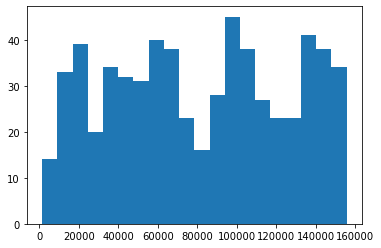

In [45]:
plot_character_hist(character_occurences, "elizabeth")

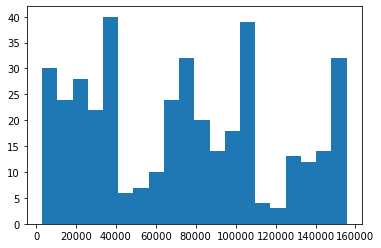

In [46]:
plot_character_hist(character_occurences, "darcy")

### Cumulative occurrences

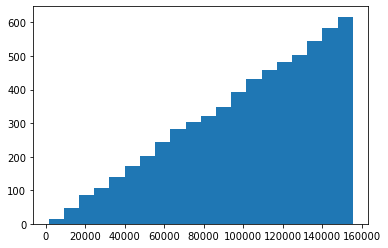

In [47]:
plot_character_hist(character_occurences, "elizabeth", cumulative=True)

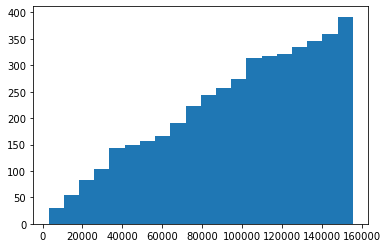

In [48]:
plot_character_hist(character_occurences, "darcy", cumulative=True)

### Spacy parse tree in action

In [49]:
# Find words (adjectives) that describe Mr. Darcy.

def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`
    
    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """
    
    adjectives = []
    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            for token in ent.subtree:
                if token.pos_ == 'ADJ': # Replace with if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)
    
    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
    
    return adjectives

print(get_character_adjectives(processed_text, 'darcy'))

['grave', 'delighted', 'late', 'late', 'late', 'late', 'intimate', 'confidential', 'present', 'infamous', 'steward', 'superior', 'opposite', 'late', 'late', 'few', 'poor', 'last', 'clever', 'worth', 'grow', 'studious', 'sorry', 'unworthy', 'answerable', 'impatient', 'ashamed', 'kind', 'handsome', 'down', 'proud', 'tall', 'punctual', 'delighted', 'fond']


In [50]:
# Find words (adjectives) that describe Elizabeth.

def get_character_adjectives(doc, character_lemma):
    """
    Find all the adjectives related to `character_lemma` in `doc`
    
    :param doc: Spacy NLP parsed document
    :param character_lemma: string object
    :return: list of adjectives related to `character_lemma`
    """
    
    adjectives = []
    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            for token in ent.subtree:
                if token.pos_ == 'ADJ': # Replace with if token.dep_ == 'amod':
                    adjectives.append(token.lemma_)
    
    for ent in processed_text.ents:
        if ent.lemma_.lower() == character_lemma:
            if ent.root.dep_ == 'nsubj':
                for child in ent.root.head.children:
                    if child.dep_ == 'acomp':
                        adjectives.append(child.lemma_)
    
    return adjectives

print(get_character_adjectives(processed_text, 'elizabeth'))

['easy', 'unaffected', 'least', 'dear', 'young', 'dear', 'dear', 'dear', 'first', 'acute', 'dear', 'latter', 'lovely', 'more', 'glad', 'catch', 'surprised', 'surprised', 'deep', 'pleased', 'watchful', 'satisfied', 'prepared', 'equal', 'ready', 'thankful', 'surprised', 'surprised', 'eager', 'shocked', 'disappointed', 'distressed', 'delighted', 'rejoiced', 'sensible', 'prepared', 'pleased', 'relieve', 'pleased', 'pleased', 'surprised', 'sorry', 'surprised', 'disgust', 'glad', 'pleased', 'determined', 'more', 'embarrassed', 'acquainted']


For all the dependencies manual: https://nlp.stanford.edu/software/dependencies_manual.pdf

`acomp`: adjectival complement
*i.e.* an adjectival phrase which functions as the complement (like an object of the verb) e.g. "She looks very beautiful": *beautiful* is an adjectival complement of *looks*

`nsubj`: nominal subject
*i.e.* a noun phrase which is the syntactic subject of a clause. The head of this relation
might not always be a verb: when the verb is a copular verb, the root of the clause is the complement of
the copular verb, which can be an adjective or noun.
*e.g.* "Clinton defeated Dole". The relationship is *nsubj(defeated, Clinton)*

"The baby is cute". The relationship is *nsubj(cute, baby)*.

In the code, `.dep_`stands for syntactic dependency, *i.e.* the relation between tokens.

In [51]:
processed_text.ents[30].root.dep_

'pobj'

In [52]:
# Find characters that are 'talking', 'saying', 'doing' the most. Find the relationship between 
# entities and corresponding root verbs.

character_verb_counter = Counter()


for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == "say":
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == "do":
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 

for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ == "talk":
        character_verb_counter[ent.text] += 1

print(character_verb_counter.most_common(10)) 


[('Elizabeth', 46), ('Bennet', 28), ('Jane', 14), ('Darcy', 13), ('Miss Bingley', 9), ('Fitzwilliam', 6), ('Bingley', 5), ('Gardiner', 5), ('Lady Catherine', 4), ('Wickham', 4)]
[('Elizabeth', 48), ('Bennet', 28), ('Darcy', 16), ('Jane', 14), ('Miss Bingley', 10), ('Gardiner', 8), ('Bingley', 7), ('Fitzwilliam', 6), ('Lady Catherine', 5), ('Lizzy', 5)]
[('Elizabeth', 48), ('Bennet', 28), ('Darcy', 16), ('Jane', 15), ('Miss Bingley', 10), ('Gardiner', 9), ('Bingley', 7), ('Lady Catherine', 7), ('Fitzwilliam', 6), ('Lizzy', 5)]


Prejudice

<IPython.core.display.Javascript object>

In [39]:
# Find 20 most used verbs
verb_counter = Counter()

for ent in processed_text.ents:
    if ent.label_ == "PERSON" and ent.root.head.pos_ == "VERB":
        verb_counter[ent.root.head.lemma_] += 1

print(verb_counter.most_common(20))

[('say', 167), ('see', 57), ('cry', 51), ('reply', 48), ('come', 30), ('look', 30), ('make', 24), ('think', 24), ('leave', 24), ('tell', 21), ('go', 21), ('give', 19), ('take', 18), ('begin', 17), ('hear', 16), ('know', 16), ('feel', 15), ('find', 15), ('call', 14), ('seem', 14)]


<IPython.core.display.Javascript object>

In [40]:
# Create a dataframe with the most used verb and how many time a character used the verb

import pandas as pd
verb_characters = {}
verb_list = [verb[0] for verb in verb_counter.most_common(20)]
for ent in processed_text.ents:
    if ent.label_ == 'PERSON' and ent.root.head.lemma_ in verb_list:
        verb = ent.root.head.lemma_
        person = ent.text
        if verb not in verb_characters:
            verb_characters[verb] = {person:1}
        else:
            if ent.text not in verb_characters[verb]:
                verb_characters[verb][person] = 1
            else:
                verb_characters[verb][person] += 1


<IPython.core.display.Javascript object>

In [43]:
verb_counter.most_common(20)

[('say', 167),
 ('see', 57),
 ('cry', 51),
 ('reply', 48),
 ('come', 30),
 ('look', 30),
 ('make', 24),
 ('think', 24),
 ('leave', 24),
 ('tell', 21),
 ('go', 21),
 ('give', 19),
 ('take', 18),
 ('begin', 17),
 ('hear', 16),
 ('know', 16),
 ('feel', 15),
 ('find', 15),
 ('call', 14),
 ('seem', 14)]

<IPython.core.display.Javascript object>

In [45]:
df = pd.DataFrame(verb_characters).transpose().fillna(0)
df

,Bennet,Long,Elizabeth,Mary,Jane,Lucas,Lizzy,Charlotte,Catherine,Darcy,...,Sarah,Eliza,John,Hunsford,Hertfordshire,Kent,Meryton,Charles,Lady Metcalf's,Younge
say,29.0,2.0,44.0,3.0,14.0,3.0,5.0,4.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
reply,4.0,0.0,18.0,0.0,7.0,0.0,0.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
make,3.0,0.0,7.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
see,2.0,0.0,17.0,0.0,8.0,0.0,1.0,1.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cry,3.0,0.0,24.0,0.0,6.0,1.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
come,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
feel,0.0,0.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hear,1.0,0.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
think,1.0,0.0,8.0,0.0,2.0,0.0,2.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tell,3.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [46]:
# drop the less meaningful columns
df = df[df.columns[df.sum()>=10]].sort_index()
df

,Bennet,Elizabeth,Jane,Lizzy,Charlotte,Darcy,Bingley,Lady Catherine,Wickham,Collins,Gardiner,Fitzwilliam
begin,1.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,0.0
call,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0
come,1.0,0.0,2.0,1.0,1.0,3.0,5.0,0.0,0.0,1.0,1.0,1.0
cry,3.0,24.0,6.0,1.0,0.0,3.0,4.0,0.0,1.0,2.0,2.0,0.0
feel,0.0,12.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
find,3.0,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
give,3.0,2.0,1.0,3.0,0.0,3.0,1.0,0.0,1.0,1.0,2.0,0.0
go,2.0,7.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0
hear,1.0,6.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
know,1.0,3.0,1.0,2.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,0.0


<IPython.core.display.Javascript object>

,Bennet,Elizabeth,Jane,Lizzy,Charlotte,Darcy,Bingley,Lady Catherine,Wickham,Collins,Gardiner,Fitzwilliam
begin,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
call,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
come,1.000000,0.000000,2.000000,1.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000
cry,3.000000,24.000000,6.000000,1.000000,0.000000,3.000000,4.000000,0.000000,1.000000,2.000000,2.000000,0.000000
feel,0.000000,12.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
find,3.000000,7.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
give,3.000000,2.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
go,2.000000,7.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000
hear,1.000000,6.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
know,1.000000,3.000000,1.000000,2.000000,0.000000,2.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000


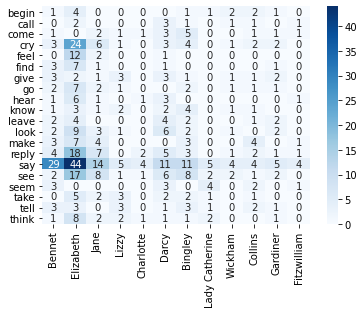

<IPython.core.display.Javascript object>

In [47]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df, annot=True, cmap='Blues')
df.style.background_gradient(cmap='Blues')


In [4]:
word_list = ["word1", "word2", "word3", "word2"]

dictionary = {}

for word in word_list:
    if word in dictionary:
        dictionary[word] += 1
    else:
        dictionary[word] = 1

In [5]:
dictionary

{'word1': 1, 'word2': 2, 'word3': 1}

In [6]:
from collections import Counter

In [8]:
counter = Counter()

for word in word_list:
    counter[word] +=1

In [13]:
counter.most_common(2)

[('word2', 2), ('word1', 1)]

In [ ]:
tokens = list(doc("text"))

"Dog" "doggy" "dogg"

In [ ]:
[token.text for token in tokens if not token.is_stop]